In [37]:
%matplotlib notebook
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import glob
import scipy.signal
import scipy
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual


In [38]:
MABU_COORD = np.array([ 52.09217080,5.25437760])

In [39]:
#logFileList = list(glob.glob("N:/projects/barbanzonnetje/code/logs/2019-08-31*"))+list(glob.glob("N:/projects/barbanzonnetje/code/logs/2019-08-30-15*"))
logFileList = list(glob.glob("N:/projects/barbanzonnetje/code/logs/2019-09-*"))

In [40]:
sorted(logFileList)

['N:/projects/barbanzonnetje/code/logs\\2019-09-07-19-58-35.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-07-20-03-35.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-07-20-08-35.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-07-20-13-13.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-13-59-21.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-04-21.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-07-04.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-12-05.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-17-06.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-22-07.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-27-09.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-32-10.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-37-12.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-42-12.tsv',
 'N:/projects/barbanzonnetje/code/logs\\2019-09-08-14-47-14.tsv',
 'N:/proje

In [41]:
data = []
for path in sorted(logFileList):
    with open(path) as f:
        for line in f:
            try:
                kv_pairs = line.strip().split(',')
                if len(kv_pairs)==0:
                    continue
                d={}
                for kv_pair in kv_pairs:
                    k,v = kv_pair.split(':')
                    v=float(v)
                    d[k] = v
                data.append(d)
            except ValueError:
                continue


In [42]:
df = pd.DataFrame(data)

In [43]:
np.interp(4313-568,
                                     [3000,4200],
                                         [0,100])

62.08333333333333

In [45]:
4500 - 568

3932

<IPython.core.display.Javascript object>


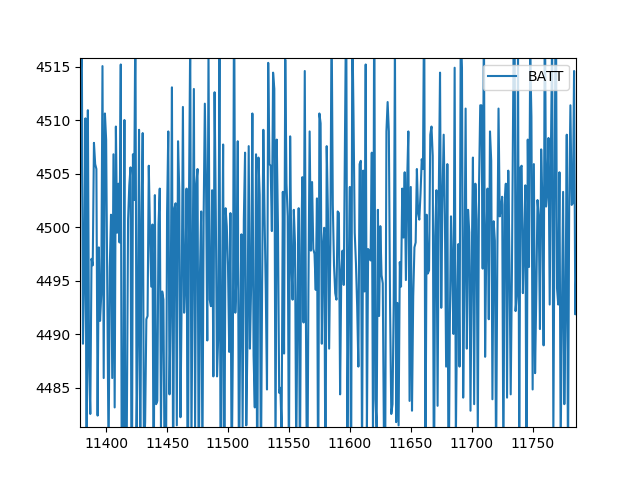

In [44]:
df[[c for c in df.columns if c.startswith('BAT')]].plot()

<IPython.core.display.Javascript object>


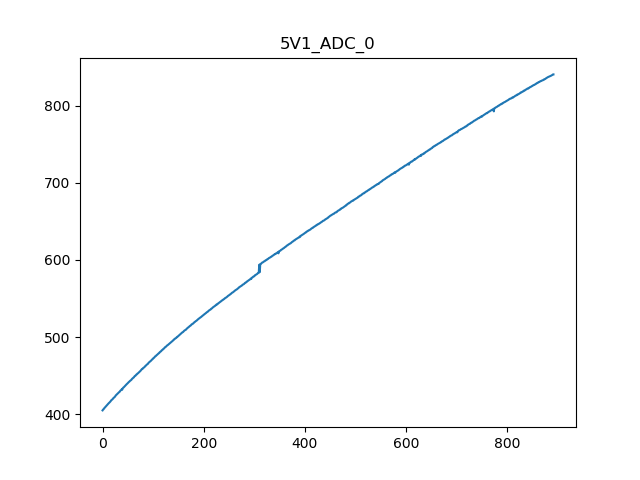

<IPython.core.display.Javascript object>


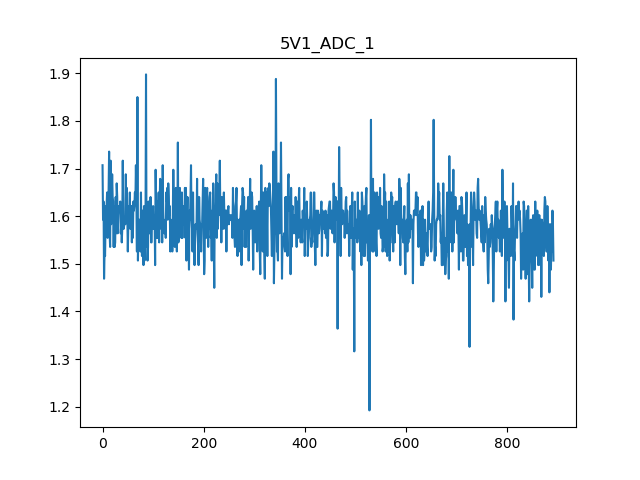

<IPython.core.display.Javascript object>


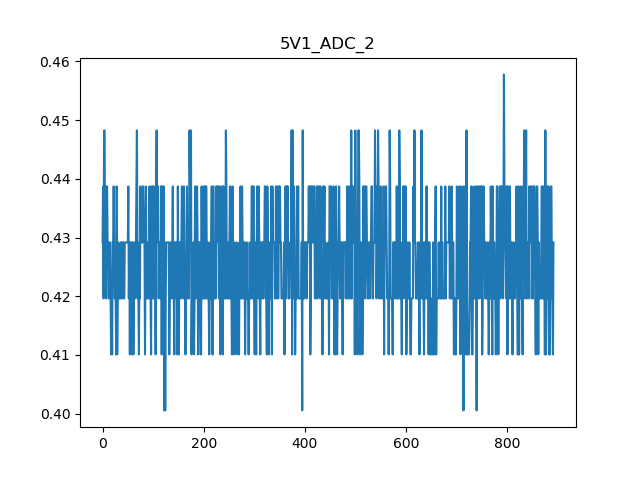

<IPython.core.display.Javascript object>


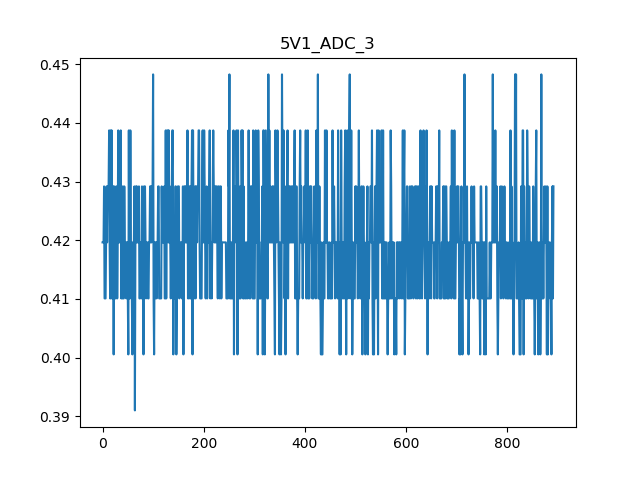

<IPython.core.display.Javascript object>


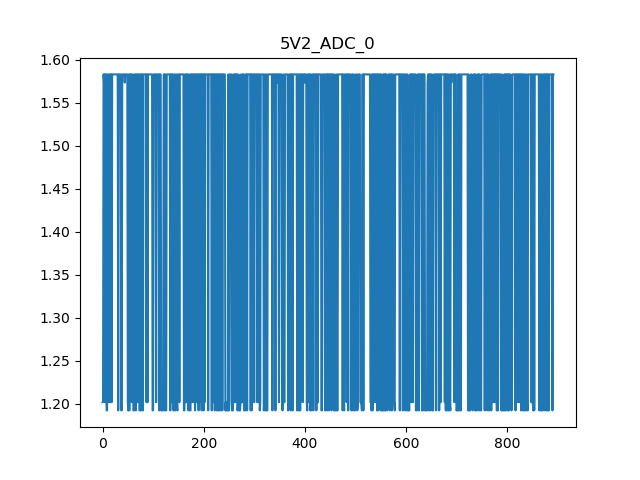

<IPython.core.display.Javascript object>


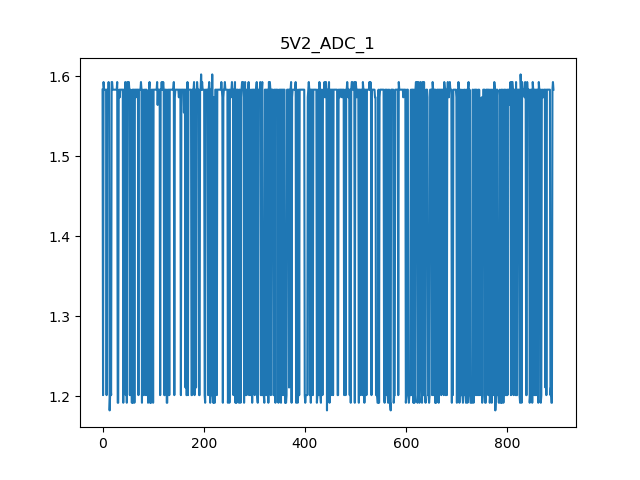

<IPython.core.display.Javascript object>


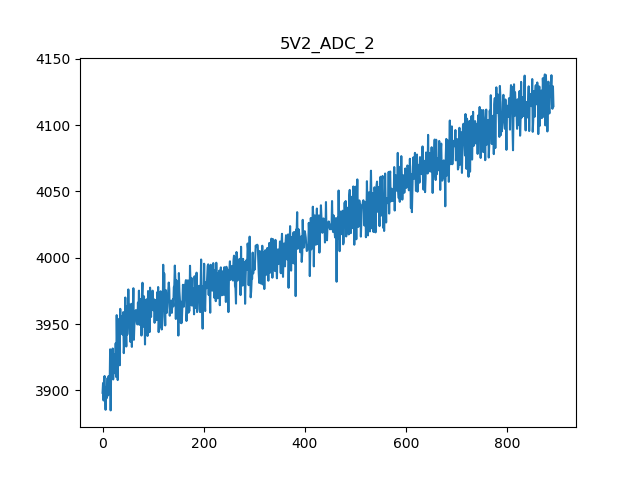

<IPython.core.display.Javascript object>


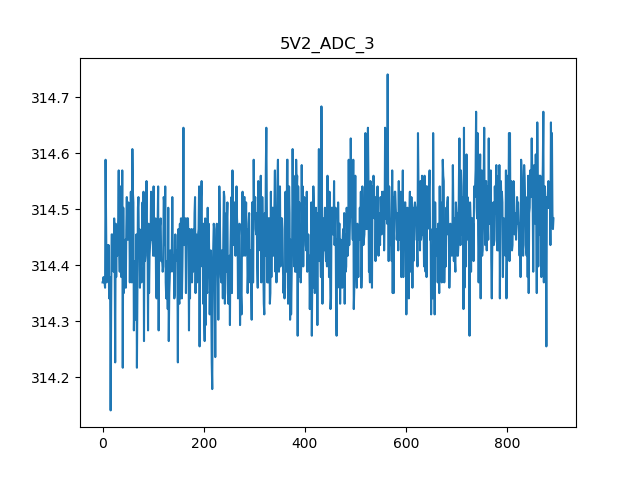

<IPython.core.display.Javascript object>


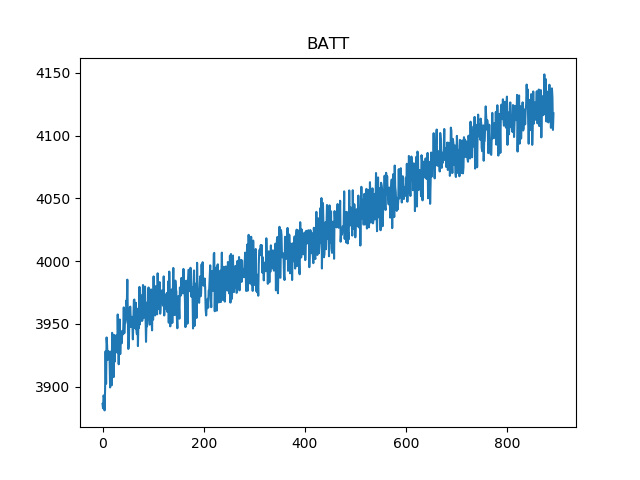

<IPython.core.display.Javascript object>


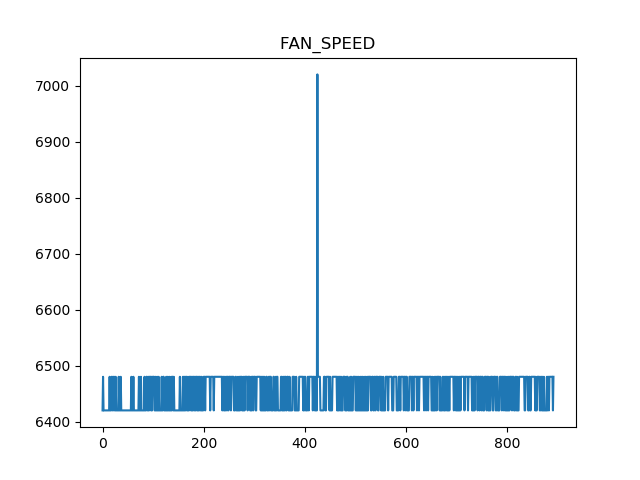

<IPython.core.display.Javascript object>


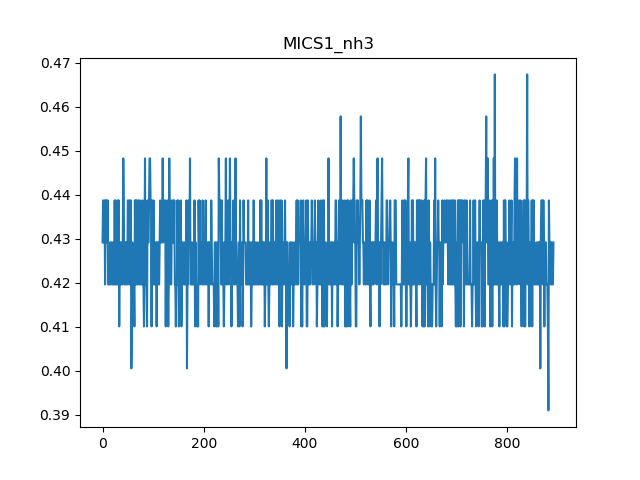

<IPython.core.display.Javascript object>


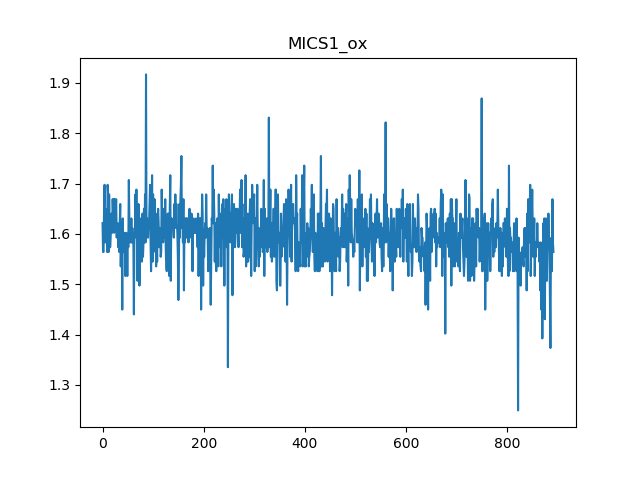

<IPython.core.display.Javascript object>


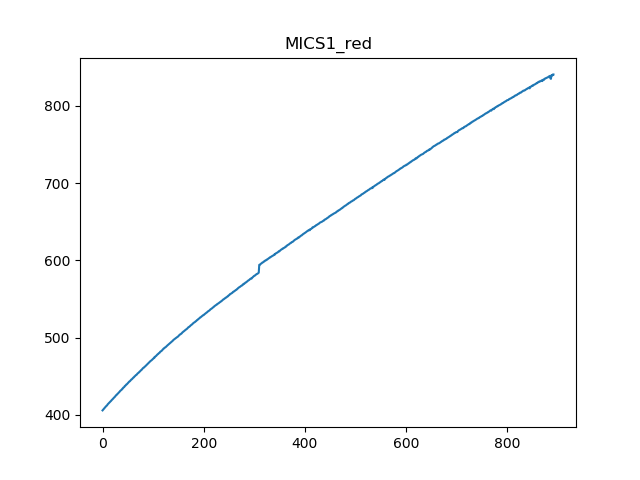

<IPython.core.display.Javascript object>


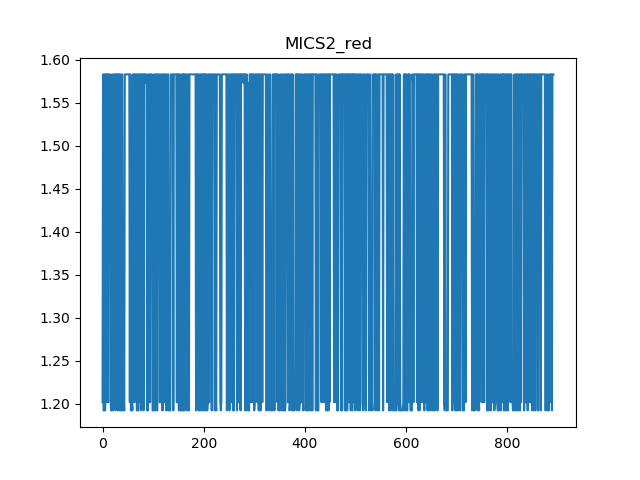

<IPython.core.display.Javascript object>


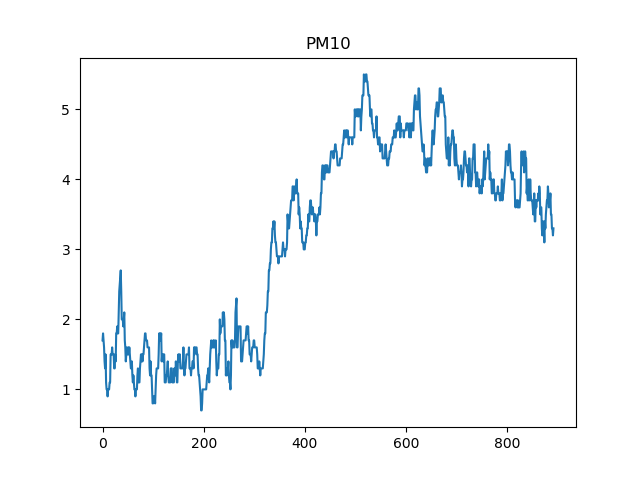

<IPython.core.display.Javascript object>


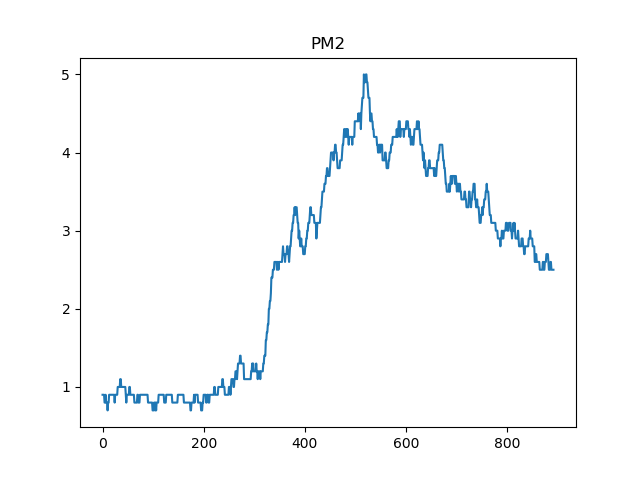

<IPython.core.display.Javascript object>


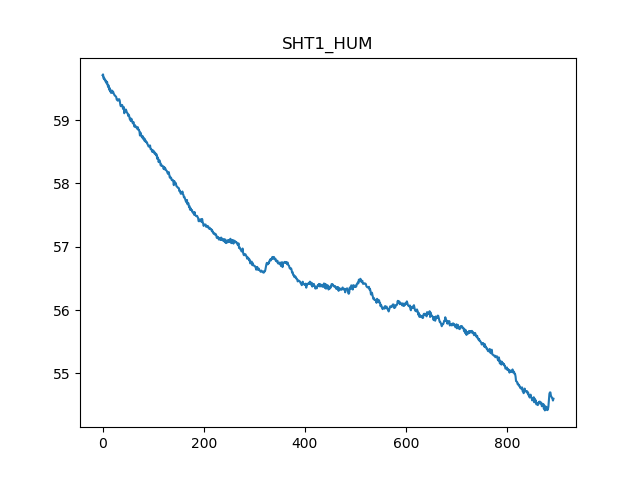

<IPython.core.display.Javascript object>


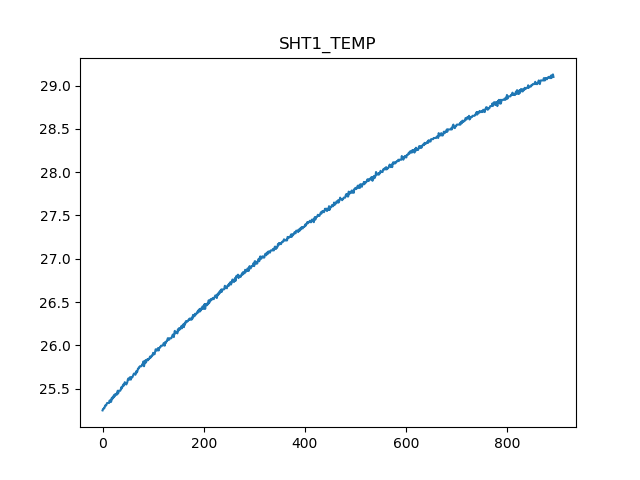

<IPython.core.display.Javascript object>


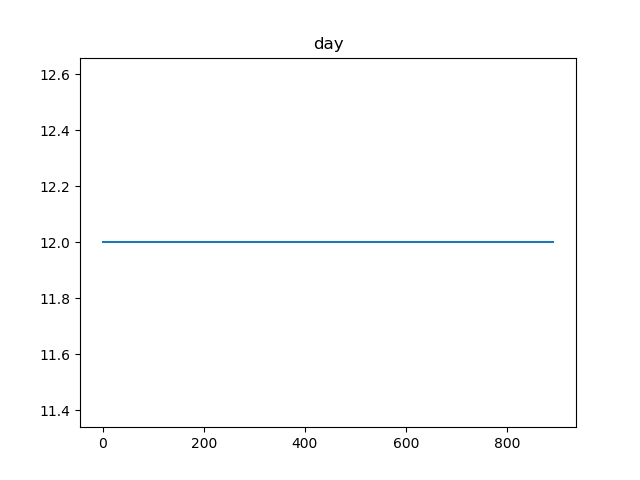

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


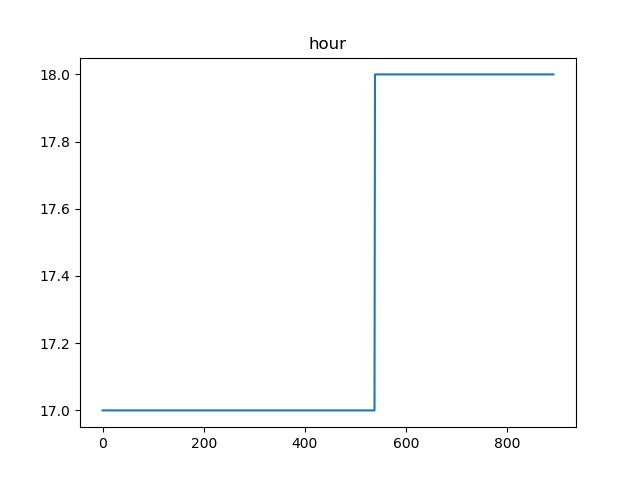

<IPython.core.display.Javascript object>


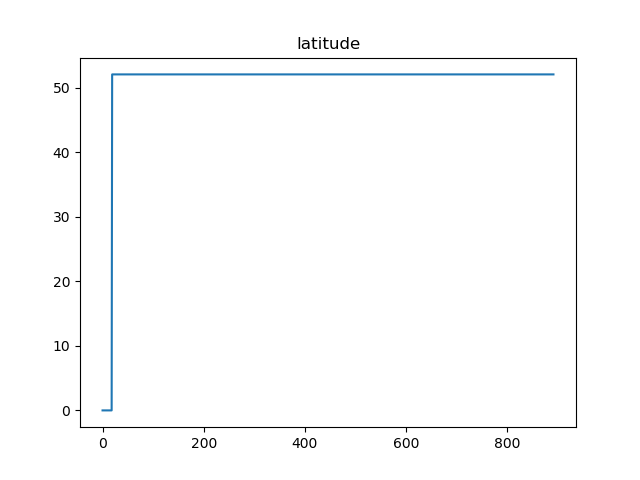

<IPython.core.display.Javascript object>


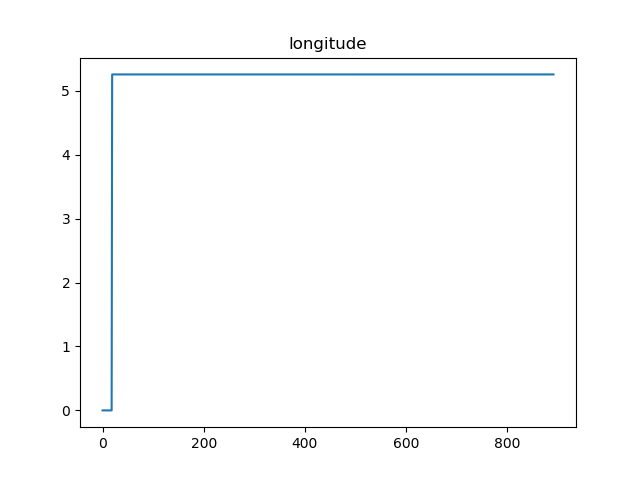

<IPython.core.display.Javascript object>


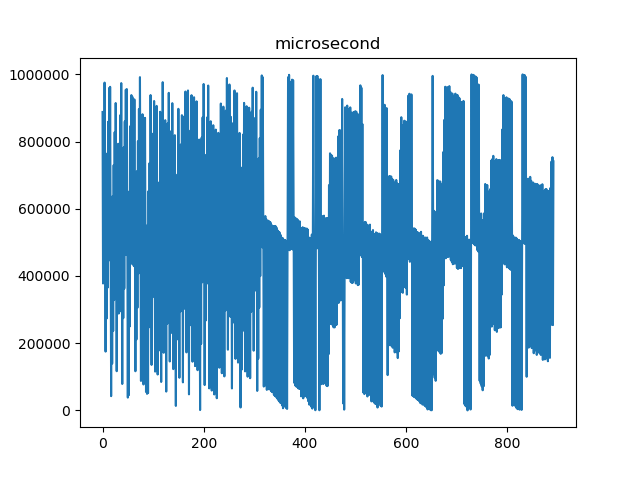

<IPython.core.display.Javascript object>


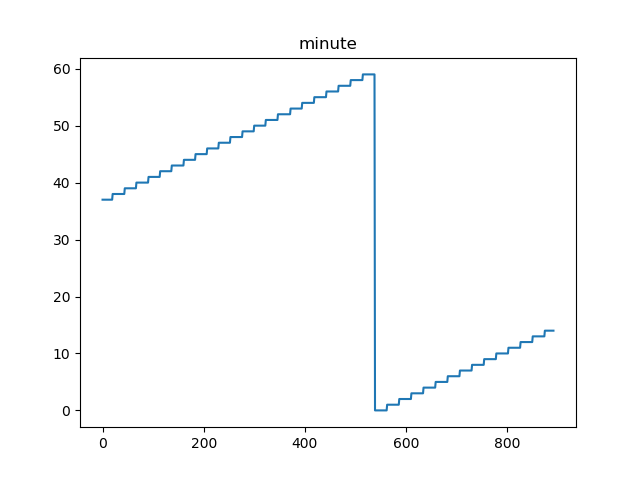

<IPython.core.display.Javascript object>


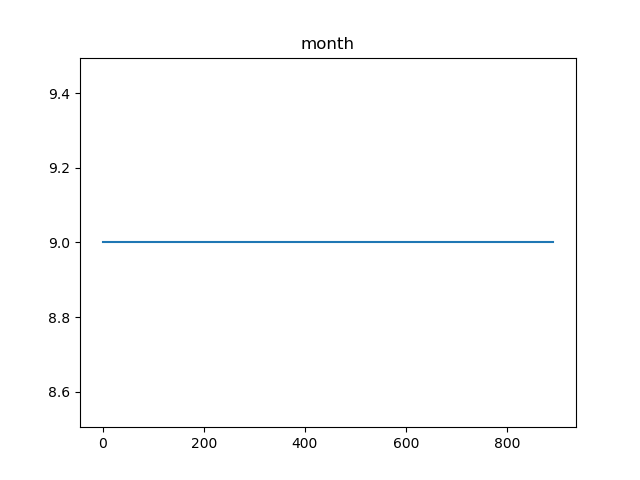

<IPython.core.display.Javascript object>


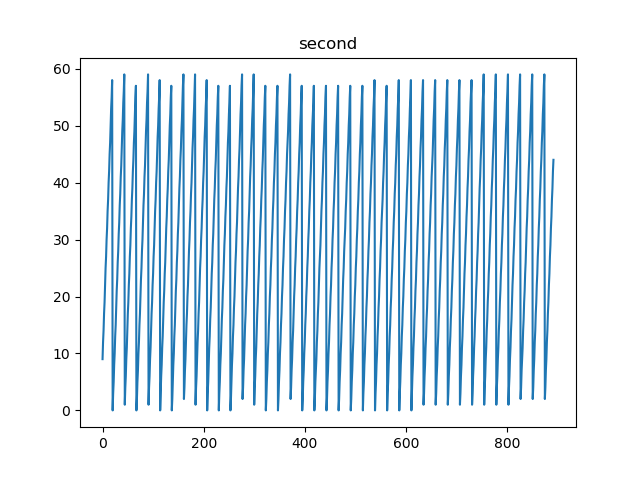

<IPython.core.display.Javascript object>


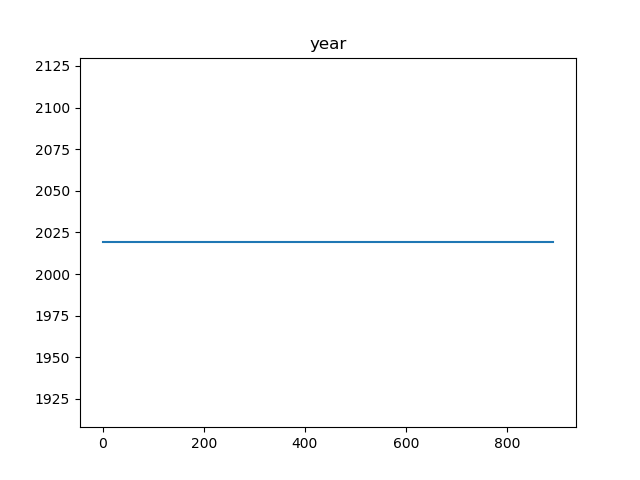

In [9]:
for column in df:
    fig,ax = plt.subplots()
    ax.plot(df[column])
    ax.set_title(column)
    plt.show()



C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


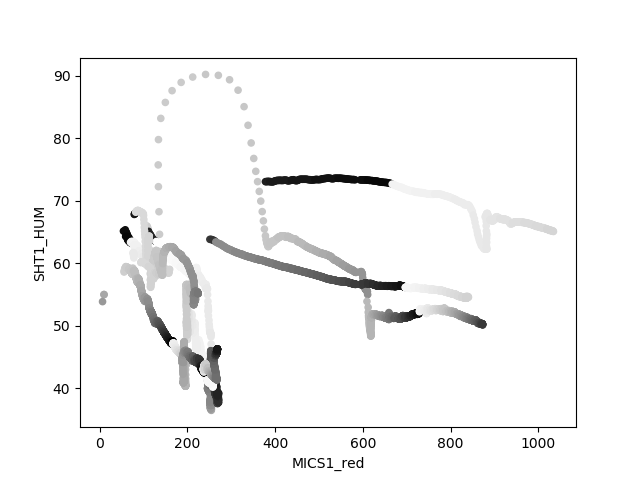

<IPython.core.display.Javascript object>


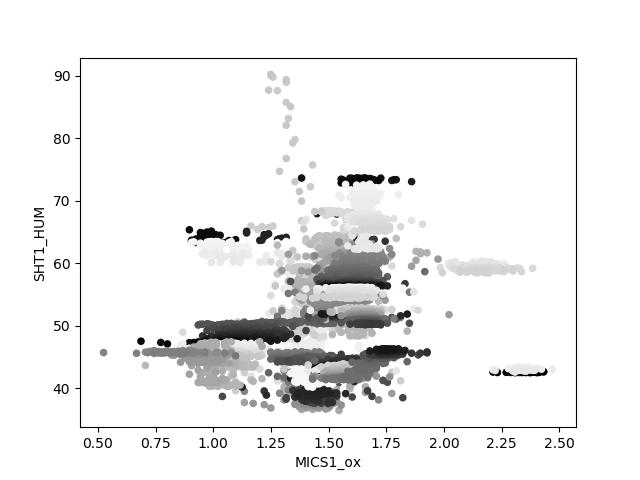

<IPython.core.display.Javascript object>


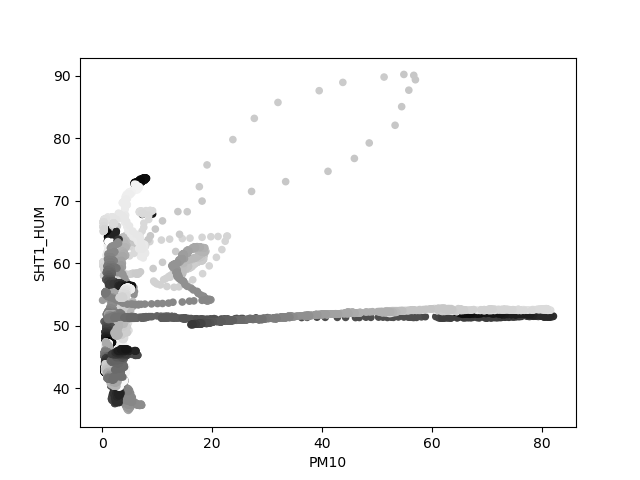

In [27]:
    
df.plot.scatter('MICS1_red','SHT1_HUM',c=(df['minute']+df['hour'].fillna(0)))
df.plot.scatter('MICS1_ox','SHT1_HUM',c=(df['minute']+df['hour'].fillna(0)))
df.plot.scatter('PM10','SHT1_HUM',c=(df['minute']+df['hour'].fillna(0)))
#df.plot.scatter('MICS2_red','SHT1_HUM')
#df.plot.scatter('MICS1_nh3','SHT1_HUM')

In [32]:
df['FAN_SPEED'] = df['FAN_SPEED']/20_000
df['BATT'] = df['BATT']/4700

In [33]:
df.columns

Index(['5V1_ADC_0', '5V1_ADC_1', '5V1_ADC_2', '5V1_ADC_3', '5V2_ADC_0',
       '5V2_ADC_1', '5V2_ADC_2', '5V2_ADC_3', 'BATT', 'FAN_SPEED', 'MICS1_nh3',
       'MICS1_ox', 'MICS1_red', 'MICS2_red', 'PM10', 'PM2', 'SHT1_HUM',
       'SHT1_TEMP', 'TERMINATION', 'day', 'hour', 'latitude', 'longitude',
       'microsecond', 'minute', 'month', 'second', 'year'],
      dtype='object')

In [34]:
import datetime

df['datetime']=[
     datetime.datetime( int(row.year), int(row.month), int(row.day), int(row.hour),  int(row.minute), int(row.second )) 
    for index,row in df.iterrows()]


ValueError: cannot convert float NaN to integer

In [31]:
df = df.set_index('datetime')

KeyError: 'datetime'

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


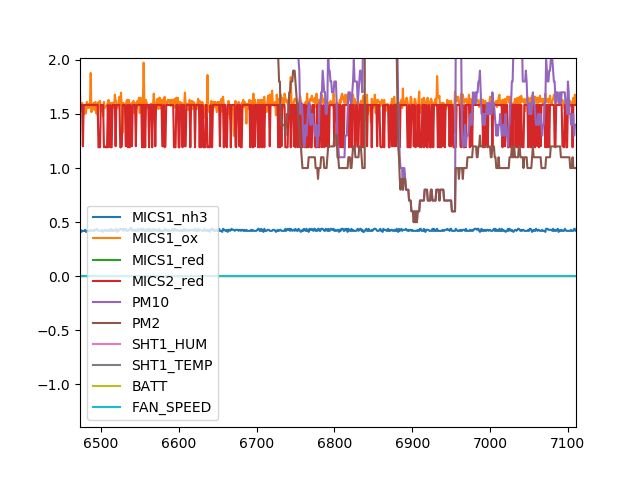

In [35]:

df[['MICS1_nh3', 'MICS1_ox', 'MICS1_red', 'MICS2_red', 'PM10', 'PM2',
   'SHT1_HUM', 'SHT1_TEMP','BATT','FAN_SPEED']].plot()
ax = plt.gca()
#ax.set_yscale('log')
    

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


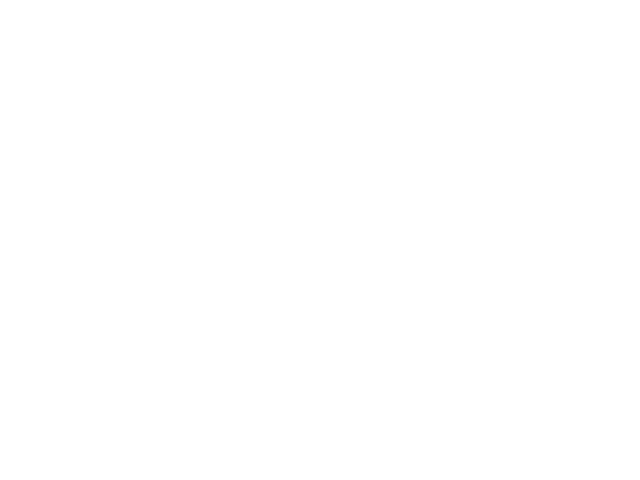

In [15]:
figx,axx = plt.subplots()
def act():
    distanceToHome = np.sqrt( np.power((df['latitude']/10_000_000)-MABU_COORD[0],2)+
                        np.power((df['longitude']/10_000_000)-MABU_COORD[1],2))
    # Interpolate coordinates
    # Optimize path such that the speed is stable
    axx.clear()
    axx.scatter(df['longitude'],
                df['latitude'],
                #c= distanceToHome)
                c= df['PM2'])
    figx.canvas.draw()

interactive(act ,val=widgets.IntRangeSlider(
    value=[0, 2],
    min=0,
    max=len(logFileList),
    step=1,
    description='GPS data range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
))

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


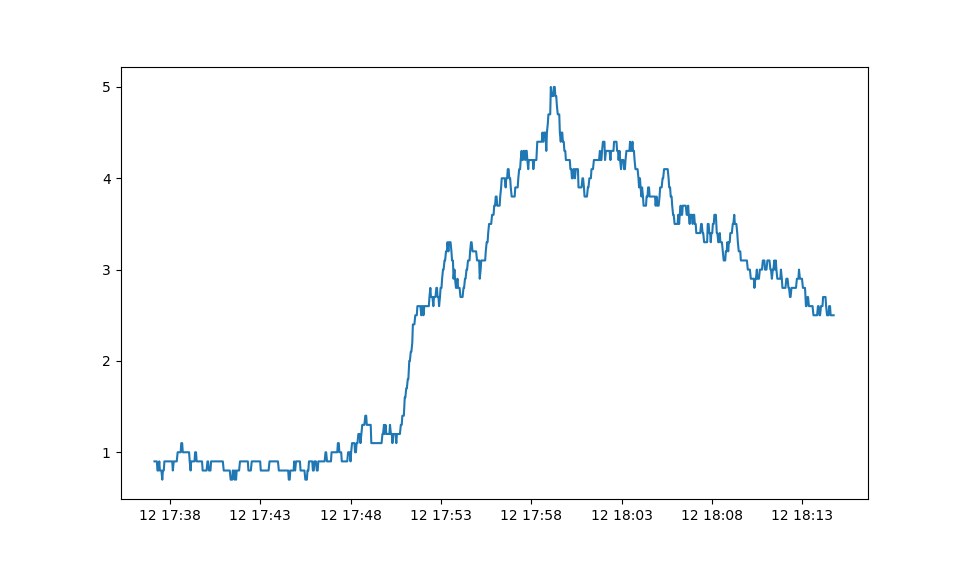

In [16]:
fig, a = plt.subplots()
plt.plot(df['PM2'])

In [18]:
distanceToHome = np.sqrt( np.power((df['latitude'])-MABU_COORD[0],2)+
                        np.power((df['longitude'])-MABU_COORD[1],2))
homeThreshold = 0.002
#df = df[distanceToHome>=homeThreshold]
df = df[df['latitude' ]!=0]
df = df[~pd.isnull(df['latitude' ])]
qf=df

In [19]:
qf.columns

Index(['5V1_ADC_0', '5V1_ADC_1', '5V1_ADC_2', '5V1_ADC_3', '5V2_ADC_0',
       '5V2_ADC_1', '5V2_ADC_2', '5V2_ADC_3', 'BATT', 'FAN_SPEED', 'MICS1_nh3',
       'MICS1_ox', 'MICS1_red', 'MICS2_red', 'PM10', 'PM2', 'SHT1_HUM',
       'SHT1_TEMP', 'day', 'hour', 'latitude', 'longitude', 'microsecond',
       'minute', 'month', 'second', 'year'],
      dtype='object')

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


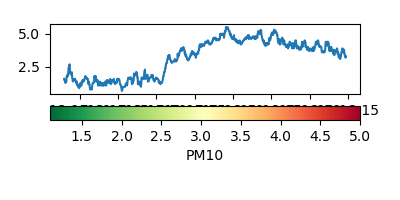

In [20]:
map_scat = folium.Map(location=MABU_COORD, zoom_start=15, width=800, height=600,max_zoom=60)
#vCol =  'SHT1_HUM'
vCol =  'PM10'

cmap = plt.get_cmap('RdYlGn_r')
vColLabel = vCol


pct = 5
vmax =  np.percentile(qf[vCol],100-pct)
vmin = np.percentile(qf[vCol],pct)
if vCol=='PM2':
    vColLabel='10μm< μg/m³ (Grens=50μg/m³)'
    vmax=20
    vmin=0
if vCol=='CH2O':
    vColLabel=r'Formaldehyde $(CH_2O)$ deeltjes per miljard'
    pct = 1
    vmax=12
    vmin=0
if vCol.startswith('BME_GAS_RES_KOhms'):
    vColLabel='Organische componenten Ω (genormaliseerd)'
    pct = 5
    cmap = plt.get_cmap('RdYlGn')
    
if vCol =='cluster':
    cmap = plt.get_cmap('tab20')
if vCol == 'MHZ_CO2':
    #Outside mode:
    vmax = 800
    vmin=380



import matplotlib as mpl
fig, axes = plt.subplots(2,1,figsize=(4,2))
ax = axes[1]
ax.axis('off')
cax = fig.add_axes([0.125, 0.4, 0.775, 0.0725]) #has to be as a list - starts with x, y coordinates for start and then width and height in % of figure width

import scipy
import scipy.signal
axes[0].plot(df[vCol]) #scipy.signal.detrend(


norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')



cb1.set_label(vColLabel)
plt.show()

def cmapper(var, vCol, df,pct):
    #r,g,b,a = cmap((var - np.percentile(df[vCol],pct)) / (np.percentile(df[vCol],100-pct)-np.percentile(df[vCol],pct)))
    #r,g,b,a = cmap((var - np.percentile(df[vCol],pct)) / (np.percentile(df[vCol],100-pct)-np.percentile(df[vCol],pct)))
    r,g,b,a = cmap( var/vmax, var)
    return colors.to_hex( (r,g,b,1))

[folium.CircleMarker( (x,y), radius=5,
                     fill=True,
                     
                     stroke=1,
                     opacity=1.0,
                     fill_opacity=0.8,
                color=(0,0,0),#cmapper(var, vCol, qf,pct),
              fill_color=cmapper(var, vCol, qf,pct)).add_to(
    map_scat) 
#for x,y,var in zip( 
#    qf['LAT2']/10_000_000,
#     qf['LNG2']/10_000_000,
#     qf[vCol])]


for x,y,var in zip( 
    df['latitude'],
   df['longitude'],
    df[vCol])]
map_scat




In [55]:
distanceToHome = np.sqrt( np.power((df['LAT2']/10_000_000)-MABU_COORD[0],2)+
                        np.power((df['LNG2']/10_000_000)-MABU_COORD[1],2))
# Interpolate coordinates
# Optimize path such that the speed is stable

plt.scatter(df['LNG2'],
            df['LAT2'],
            c= distanceToHome)
#ax.set_ylim((0,100))

In [56]:
max(distanceToHome)

0.01649318294963104

<IPython.core.display.Javascript object>


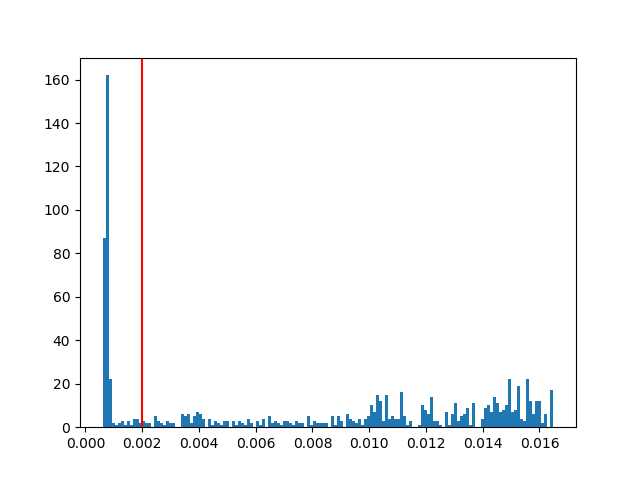

In [57]:
fig,ax = plt.subplots()
homeThreshold = 0.002
plt.hist(distanceToHome,bins=150)
ax.axvline(homeThreshold,c='r')

In [58]:
df['TY2'].unique()

array([19.])

<IPython.core.display.Javascript object>


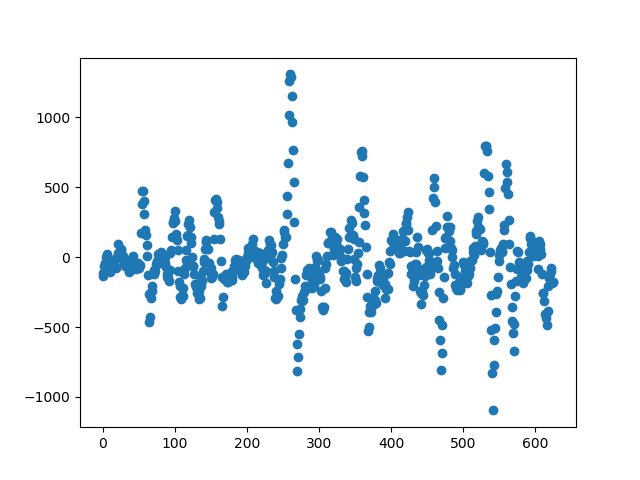

In [19]:
fig, ax = plt.subplots()
kernel = np.array([-5,-4,-3,-2,-1,0,0,0,1,2,3,4,5])
y = np.convolve(
        np.array(df['BME_GAS_RES_KOhms']), 
    kernel,'valid')
df.loc[:,'BME_GAS_RES_KOhms_CONV'] = np.concatenate( ([np.nan]*int(((len(kernel)-1))/2),  y, [np.nan]*int((len(kernel)-1)/2)))
df = df.loc[13:,:]
plt.scatter(np.arange(len(y)),y)
df.loc[:,'BME_GAS_RES_KOhms_DT'] = 1-scipy.signal.detrend(df['BME_GAS_RES_KOhms'])


<IPython.core.display.Javascript object>


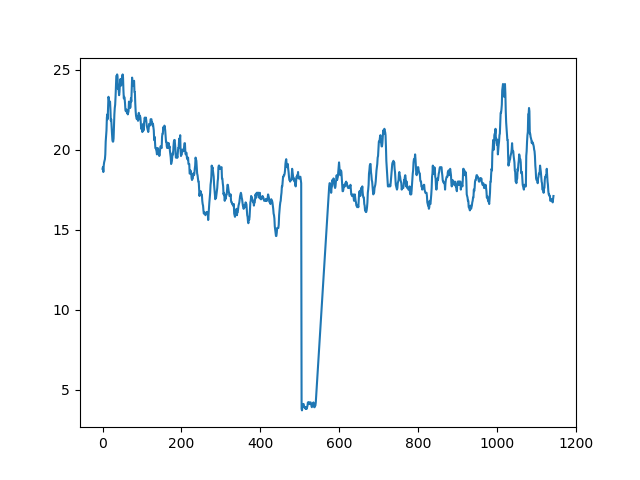

In [91]:
fig, ax = plt.subplots()
import scipy
import scipy.signal
plt.plot(df['P25']) #scipy.signal.detrend(

In [44]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE()
m= df[[  'BME_HUM_RH', 
       'BME_TEMP', 'CH2O','MHZ_CO2', 'P10',
       'P25', 'SHT_HUM', 'SHT_TEMP']]
tc = tsne.fit_transform(m)

KeyboardInterrupt: 

In [ ]:
import sklearn.cluster
c = sklearn.cluster.AgglomerativeClustering(n_clusters=7)

In [ ]:
clusters = c.fit_predict(tc,)

In [ ]:
df['cluster'] = clusters

<IPython.core.display.Javascript object>


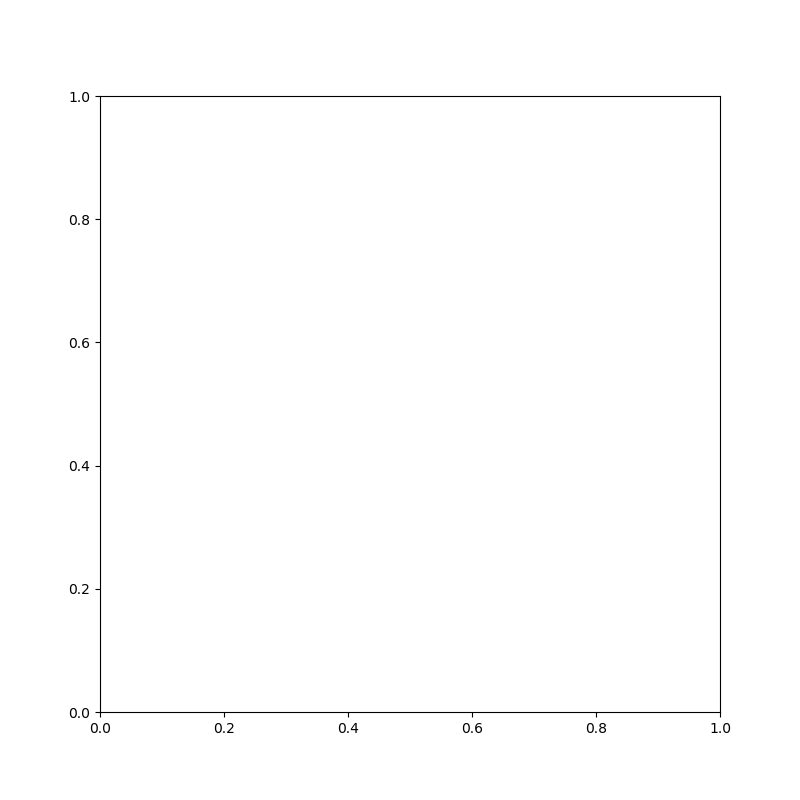

NameError: name 'tc' is not defined

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(tc[:,0],tc[:,1],c=clusters)
plt.show()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(tc[:,0],tc[:,1],c=df['MHZ_CO2'])
plt.show()



<IPython.core.display.Javascript object>


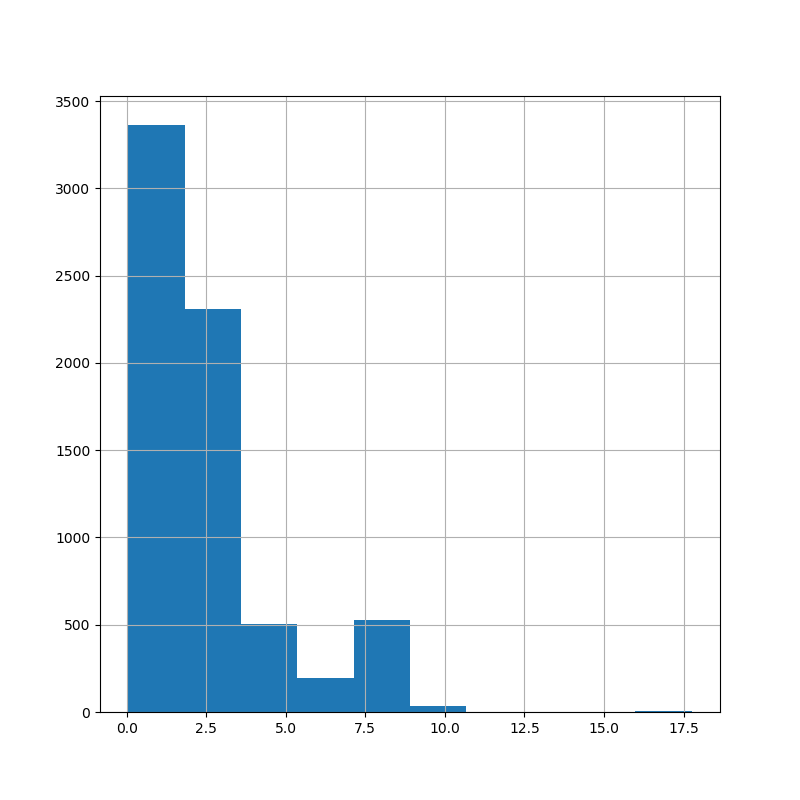

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
df['P10'].hist()
plt.show()

In [27]:
df[ 'BME_GAS_RES_KOhms', 'BME_HUM_RH', 'BME_PRESS_HPA',
       'BME_TEMP', 'CH2O',  'LAT2',  'LNG2', 'MHZ_CO2', 'P10']

KeyError: ('BME_GAS_RES_KOhms', 'BME_HUM_RH', 'BME_PRESS_HPA', 'BME_TEMP', 'CH2O', 'LAT2', 'LNG2', 'MHZ_CO2', 'P10')

<IPython.core.display.Javascript object>


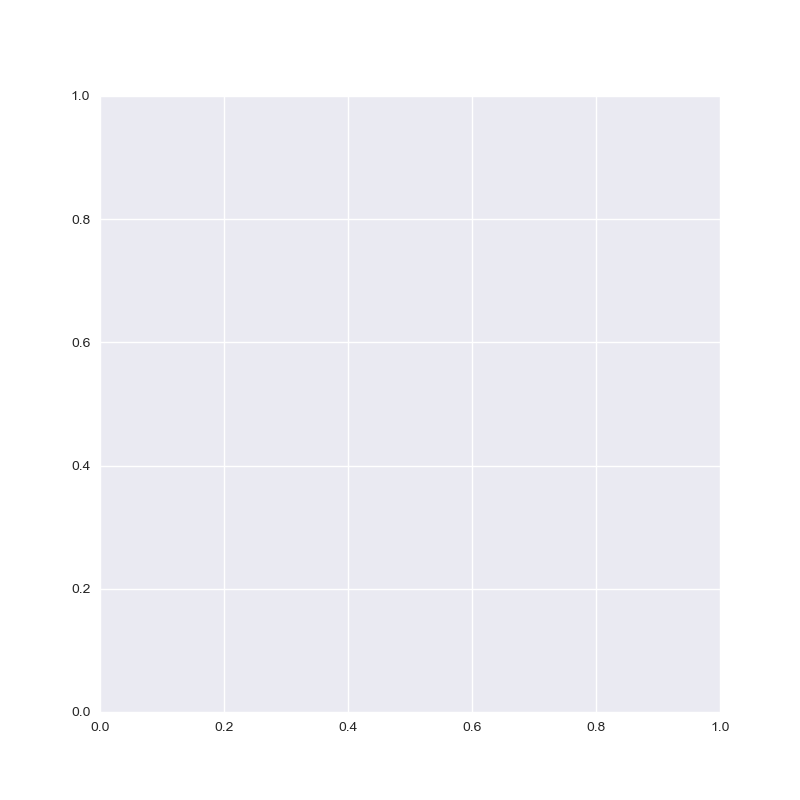

<IPython.core.display.Javascript object>


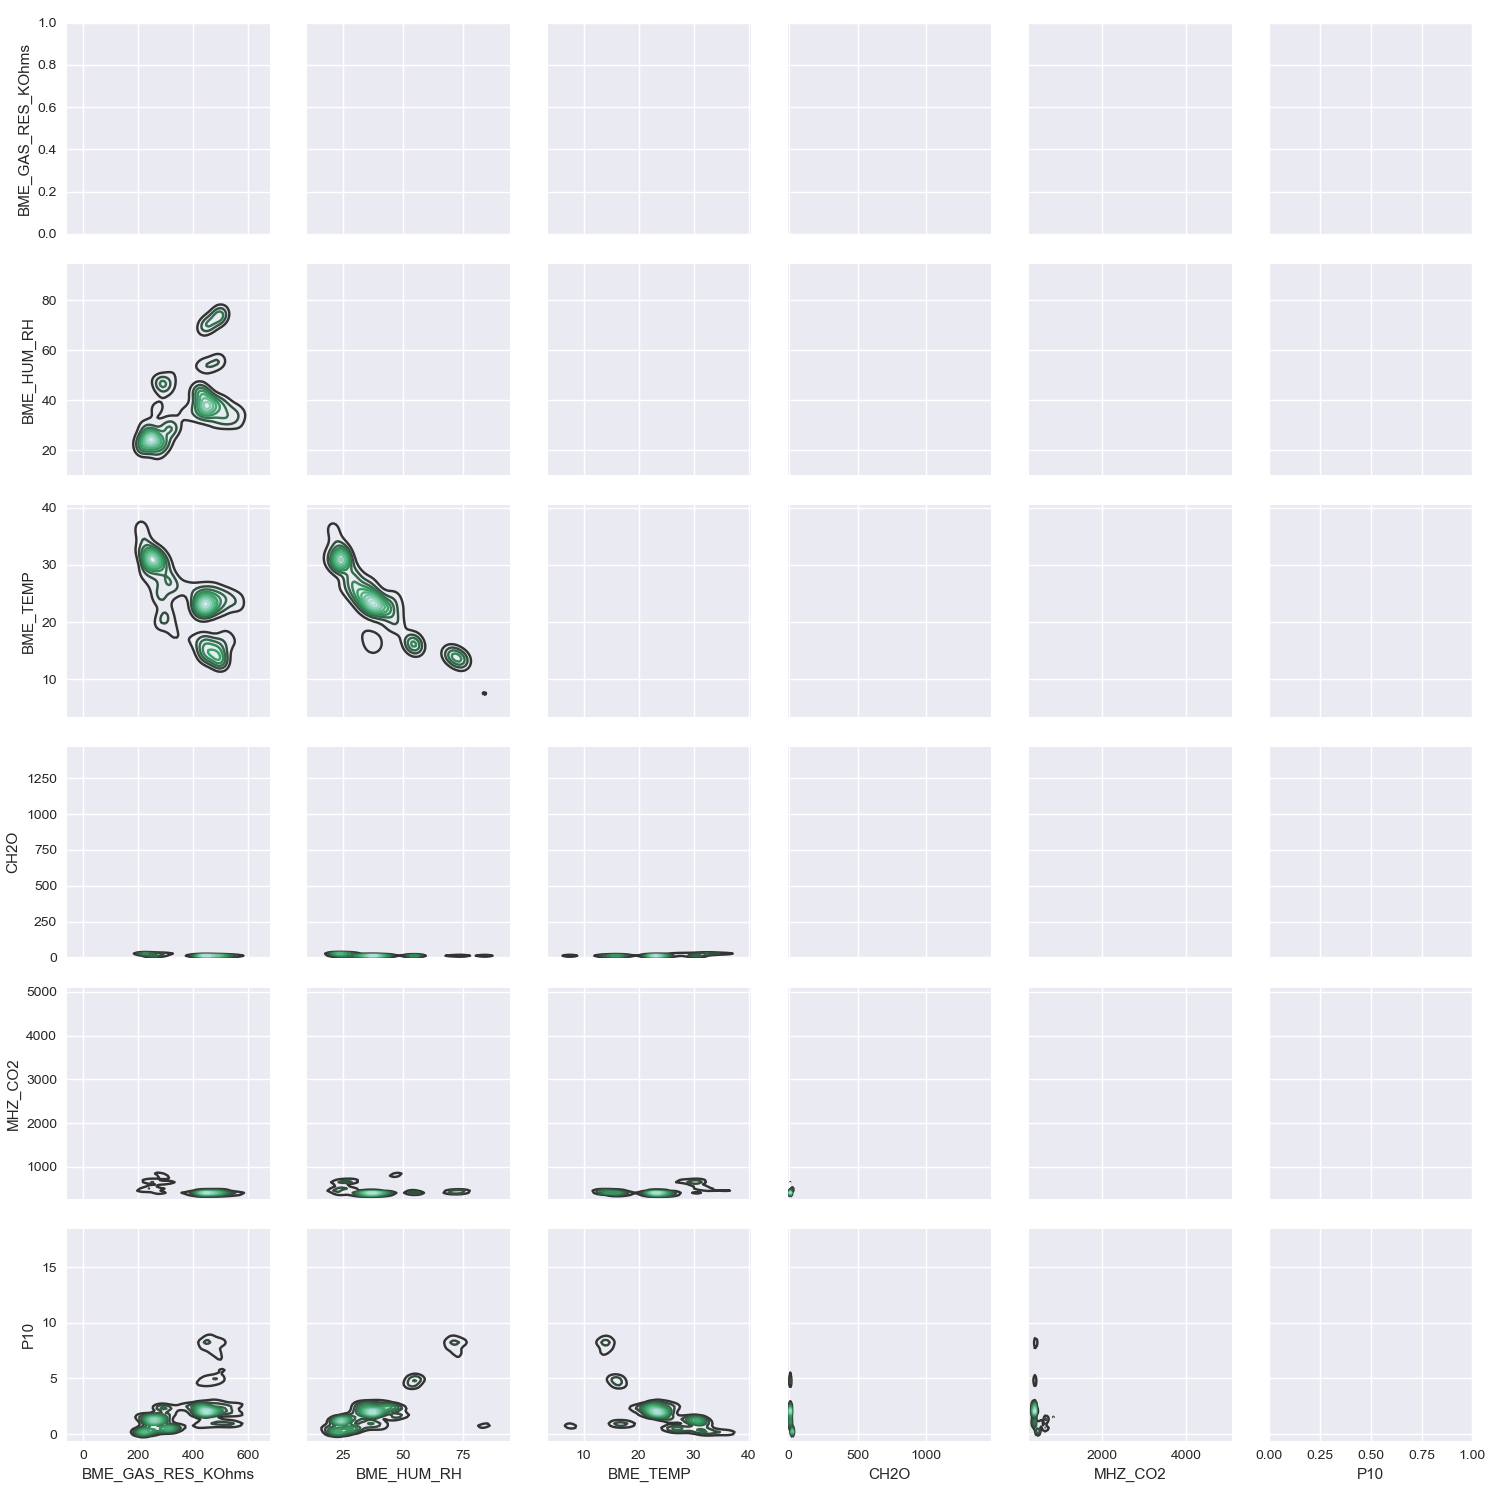

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


In [65]:
fig, ax = plt.subplots(figsize=(8,8))
import seaborn as sns
g = sns.PairGrid(df[[ 'BME_GAS_RES_KOhms', 'BME_HUM_RH', 
       'BME_TEMP', 'CH2O',  'MHZ_CO2', 'P25']].fillna(0))
g.map_lower(sns.kdeplot)
#g.map_upper(sns.scatterplot)
#g.map_diag(sns.kdeplot, lw=3)
#plt.scatter( df['BME_GAS_RES_KOhms'],df['MHZ_CO2'])

In [22]:
qf = df #df[-3000:]
qf.columns

Index(['BME_ALT', 'BME_GAS_RES_KOhms', 'BME_HUM_RH', 'BME_PRESS_HPA',
       'BME_TEMP', 'CH2O', 'LAT', 'LAT2', 'LNG', 'LNG2', 'MHZ_CO2', 'P10',
       'P25', 'SHT_HUM', 'SHT_TEMP', 'SPEED', 'SPEED2', 'TH', 'TH2', 'TM',
       'TM2', 'TMD', 'TMD2', 'TMM', 'TMM2', 'TS', 'TS2', 'TY', 'TY2', 'V_D',
       'V_D2', 'V_E', 'V_E2', 'V_N', 'V_N2', 'BME_GAS_RES_KOhms_CONV',
       'BME_GAS_RES_KOhms_DT'],
      dtype='object')

<IPython.core.display.Javascript object>


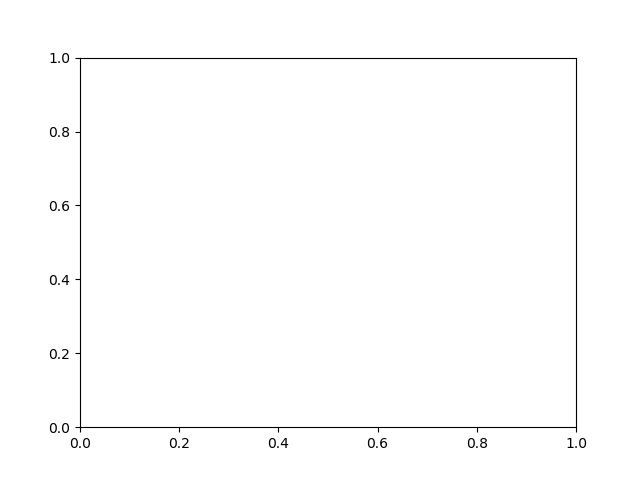

Empty DataFrame
Columns: [BME_ALT, BME_GAS_RES_KOhms, BME_HUM_RH, BME_PRESS_HPA, BME_TEMP, CH2O, LAT, LAT2, LNG, LNG2, MHZ_CO2, P10, P25, SHT_HUM, SHT_TEMP, SPEED, SPEED2, TH, TH2, TM, TM2, TMD, TMD2, TMM, TMM2, TS, TS2, TY, TY2, V_D, V_D2, V_E, V_E2, V_N, V_N2, BME_GAS_RES_KOhms_CONV, BME_GAS_RES_KOhms_DT]
Index: []

[0 rows x 37 columns]

In [23]:
fig,ax = plt.subplots()
qf[qf['P25']>40]

C:\Users\BuysDB\Anaconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


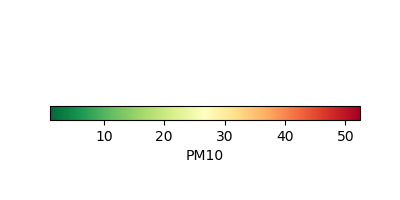

KeyError: 'LAT'

In [28]:
map_scat = folium.Map(location=MABU_COORD, zoom_start=15, width=800, height=600,max_zoom=60)
#vCol =  'SHT_TEMP'
vCol =  'PM10'
cmap = plt.get_cmap('RdYlGn_r')
vColLabel = vCol


pct = 0.5
vmax =  np.percentile(qf[vCol],100-pct)
vmin = np.percentile(qf[vCol],pct)
if vCol=='P25':
    vColLabel='10μm< μg/m³ (Grens=50μg/m³)'
    #vmax=20
if vCol=='CH2O':
    vColLabel=r'Formaldehyde $(CH_2O)$ deeltjes per miljard'
    pct = 1
    vmax=12
    vmin=0
if vCol.startswith('BME_GAS_RES_KOhms'):
    vColLabel='Organische componenten Ω (genormaliseerd)'
    pct = 5
    cmap = plt.get_cmap('RdYlGn')
    
if vCol =='cluster':
    cmap = plt.get_cmap('tab20')
if vCol == 'MHZ_CO2':
    #Outside mode:
    vmax = 800
    vmin=380



import matplotlib as mpl
fig, ax = plt.subplots(figsize=(4,2))
ax.axis('off')
cax = fig.add_axes([0.125, 0.4, 0.775, 0.0725]) #has to be as a list - starts with x, y coordinates for start and then width and height in % of figure width

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')



cb1.set_label(vColLabel)
plt.show()

def cmapper(var, vCol, df,pct):
    #r,g,b,a = cmap((var - np.percentile(df[vCol],pct)) / (np.percentile(df[vCol],100-pct)-np.percentile(df[vCol],pct)))
    r,g,b,a = cmap((var - np.percentile(df[vCol],pct)) / (np.percentile(df[vCol],100-pct)-np.percentile(df[vCol],pct)))
    return colors.to_hex( (r,g,b,1))

[folium.CircleMarker( (x,y), radius=5,
                     fill=True,
                     
                     stroke=0,
                     opacity=1.0,
                     fill_opacity=0.8,
                color=cmapper(var, vCol, qf,pct),
              fill_color=cmapper(var, vCol, qf,pct)).add_to(
    map_scat) 
#for x,y,var in zip( 
#    qf['LAT2']/10_000_000,
#     qf['LNG2']/10_000_000,
#     qf[vCol])]


for x,y,var in zip( 
    pd.concat( (df['LAT']/10_000_000,df['LAT2']/10_000_000)),
     pd.concat( (df['LNG']/10_000_000,df['LNG2']/10_000_000)),
     pd.concat((df[vCol],df[vCol])))]
map_scat

<IPython.core.display.Javascript object>


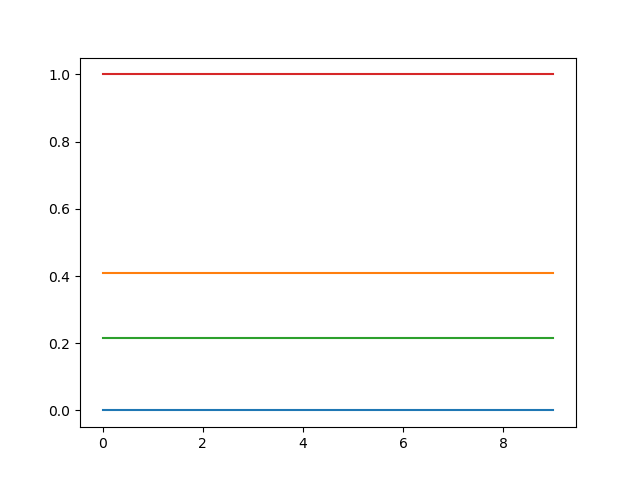

In [28]:
fig, ax = plt.subplots()
plt.plot( 
 [ cmap((x - np.percentile(df[vCol],1)) / (np.percentile(df[vCol],99)-np.percentile(df[vCol],1)))
  for x in range(10,20)
 ])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['LAT'],df['LNG'])